In [30]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Import scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

import keras
from keras.utils import np_utils
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

In [31]:
# this command will download the LFW_people's dataset to hard disk.
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4) # downloading face dataset

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# Instead of providing 2D data, X has data already in the form of a vector that
# is required in this approach.
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Print Details about dataset
print("Number of Data Samples: % d" % n_samples)
print("Features of a data sample: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)

Number of Data Samples:  1288
Features of a data sample:  1850
Number of Class Labels:  7


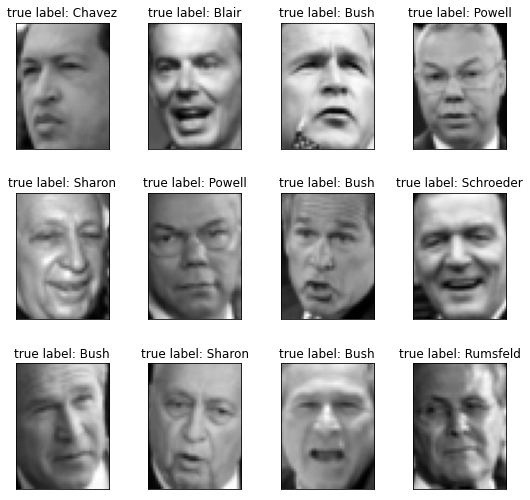

In [32]:
# Function to plot images in 3 * 4
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
	plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
	plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
	for i in range(n_row * n_col):
		plt.subplot(n_row, n_col, i + 1)
		plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
		plt.title(titles[i], size = 12)
		plt.xticks(())
		plt.yticks(())

# Generate true labels above the images
def true_title(Y, target_names, i):
	true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
	return 'true label: % s' % (true_name)

true_titles = [true_title(y, target_names, i)
					for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)

In [33]:
# dividing the dataset into training and testing, total 1288 = 966 + 322, 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print("size of training Data is % d and Testing Data is % d" %(y_train.shape[0], y_test.shape[0]))

#X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
#X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(X_train.shape)

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

size of training Data is  966 and Testing Data is  322
(966, 1850)


In [34]:
model = Sequential()
model.add(Dense(1024, input_shape=(n_features, ), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()


model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=16, epochs=50,
                    validation_data=(X_test, y_test))

# another optimizer SGD


#sgd = SGD(lr=0.01)
#model.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 1024)              1895424   
                                                                 
 dense_26 (Dense)            (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 7)                 3591      
                                                                 
Total params: 2,423,815
Trainable params: 2,423,815
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
61/61 [==============================] - 2s 27ms/step - loss: 227.5253 - accuracy: 0.2474 - val_loss: 4.5051 - val_accuracy: 0.2081
Epoch 2/50
61/61 [==============

Text(0.5, 1.0, 'Loss Curves')

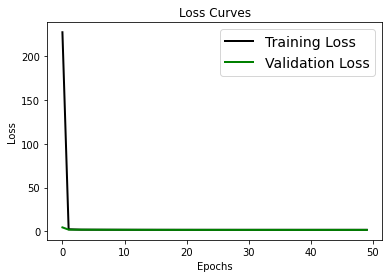

In [35]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

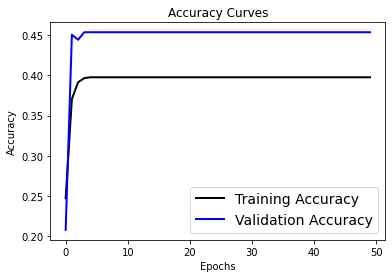

In [36]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [37]:
# Making the Predictions
pred = model.predict(X_test)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

11/11 [==============================] - 0s 7ms/step
[[0.0682352  0.18074083 0.09711105 ... 0.08738826 0.06070343 0.11201049]
 [0.0682352  0.18074083 0.09711105 ... 0.08738826 0.06070343 0.11201049]
 [0.0682352  0.18074083 0.09711105 ... 0.08738826 0.06070343 0.11201049]
 ...
 [0.0682352  0.18074083 0.09711105 ... 0.08738826 0.06070343 0.11201049]
 [0.06823521 0.18074085 0.09711106 ... 0.08738827 0.06070344 0.11201049]
 [0.06823521 0.18074085 0.09711106 ... 0.08738827 0.06070344 0.11201049]]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

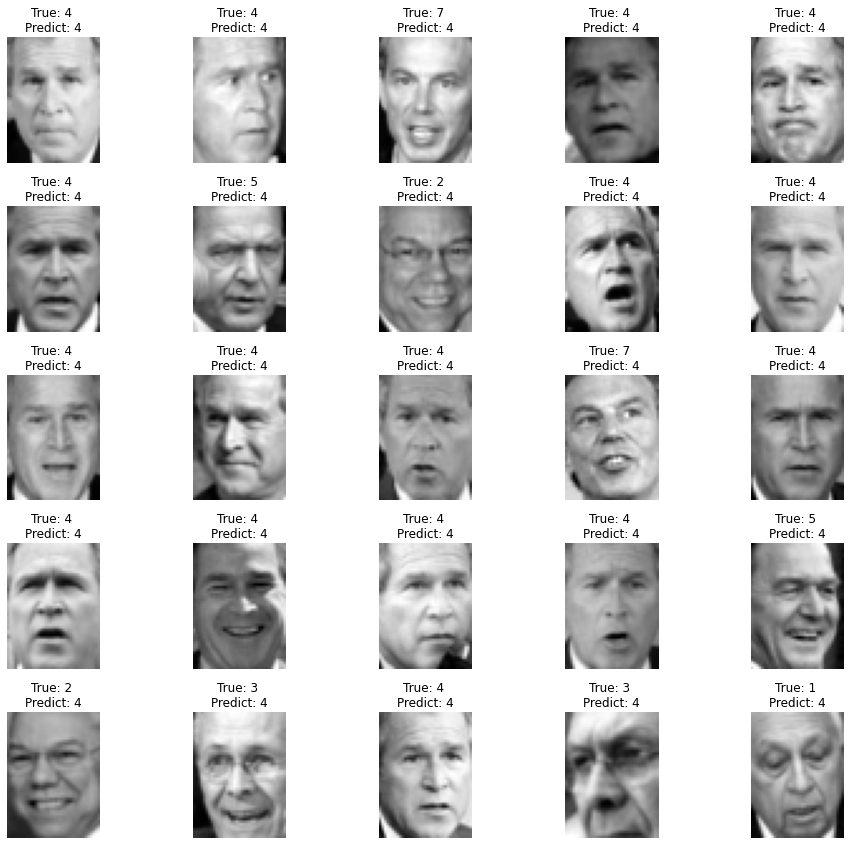

In [38]:
# Creating a list of all the class labels
class_names = ['1', '2', '3', '4', '5',
               '6', '7']

# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i].reshape((h, w)), cmap=plt.cm.gray)
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)